In [1]:
import numpy as np  #does mathematical operation
import matplotlib.pyplot as plt #For plotting the graphs
import pandas as pd #making the data frames and import the csv files

In [2]:
dataset = pd.read_csv('Bank_data.csv')      #To read the CSV File       

In [3]:
dataset['y'].map()      #to Print the first 5 Values of the Dataset

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.334,0.0,1.0,0.0,0.0,117.0,no
1,1,0.767,0.0,0.0,2.0,1.0,274.0,yes
2,2,4.858,0.0,1.0,0.0,0.0,167.0,no
3,3,4.120,0.0,0.0,0.0,0.0,686.0,yes
4,4,4.856,0.0,1.0,0.0,0.0,157.0,no


In [4]:
dataset.describe()      #Would result into the Statistical Analysis of all the data

,Unnamed: 0,interest_rate,credit,march,may,previous,duration
count,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000
mean,258.500000,2.835776,0.034749,0.266409,0.388031,0.127413,382.177606
std,149.677988,1.876903,0.183321,0.442508,0.814527,0.333758,344.295990
min,0.000000,0.635000,0.000000,0.000000,0.000000,0.000000,9.000000
25%,129.250000,1.042750,0.000000,0.000000,0.000000,0.000000,155.000000
50%,258.500000,1.466000,0.000000,0.000000,0.000000,0.000000,266.500000
75%,387.750000,4.956500,0.000000,1.000000,0.000000,0.000000,482.750000
max,517.000000,4.970000,1.000000,1.000000,5.000000,1.000000,2653.000000


In [5]:
dataset.shape   #Our dataset has 303 datapoints for 13 input feature and 1 output/target variable.

(518, 8)

In [37]:
X_input_features = dataset.iloc[:,:12]      #Seperating the independent input features from the dataset

In [38]:
X_input_features

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.334,0.0,1.0,0.0,0.0,117.0,no
1,1,0.767,0.0,0.0,2.0,1.0,274.0,yes
2,2,4.858,0.0,1.0,0.0,0.0,167.0,no
3,3,4.120,0.0,0.0,0.0,0.0,686.0,yes
4,4,4.856,0.0,1.0,0.0,0.0,157.0,no
...,...,...,...,...,...,...,...,...
513,513,1.334,0.0,1.0,0.0,0.0,204.0,no
514,514,0.861,0.0,0.0,2.0,1.0,806.0,yes
515,515,0.879,0.0,0.0,0.0,0.0,290.0,no
516,516,0.877,0.0,0.0,5.0,1.0,473.0,yes


In [34]:
X_input_features        #printing the result

In [39]:
Y_target_variable = dataset.iloc[:,-1]         #seperating the target or dependent variable Y from the Dataset      

In [40]:
Y_target_variable.map( {'yes':1 ,'no':0})        #printing the result

0      0
1      1
2      0
3      1
4      0
      ..
513    0
514    1
515    0
516    1
517    0
Name: y, Length: 518, dtype: int64

In [15]:
isHeart_risk = dataset.loc[Y_target_variable==1]        #Seperatign the patient who has heart risk

In [16]:
notHeart_risk = dataset.loc[Y_target_variable==0]       #Seperatign the patient who not have heart risk

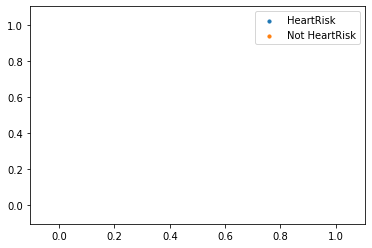

Text(0.5, 1.0, 'Graph for the people who have heart risk or not based on age and sex')

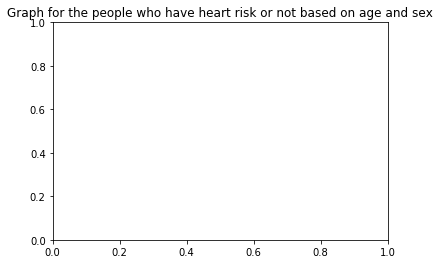

In [17]:
#Plot to show the difference in the classes given in the dataset.
plt.scatter(isHeart_risk.iloc[:, 0], isHeart_risk.iloc[:, 1], s=10, label='HeartRisk')
plt.scatter(notHeart_risk.iloc[:, 0], notHeart_risk.iloc[:, 1], s=10, label='Not HeartRisk')
plt.legend()
plt.show()
plt.title('Graph for the people who have heart risk or not based on age and sex')

In [41]:
#import the library for the testing and the training split.
from sklearn.model_selection import train_test_split

In [51]:
#convert to the array
X_input_features = np.array(X_input_features)
Y_target_variable = np.array(Y_target_variable)

In [52]:
X_train,X_test,Y_train,Y_test = train_test_split(X_input_features,Y_target_variable,test_size=0.25,random_state=42)      #First train and test data for featureand then for labels

In [53]:
#Seeing all 4 seperated values.
'''
print(X_train)
print(X_test)
print(Y_train)
print(Y_test)
'''
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(388, 8)
(130, 8)
(388,)
(130,)


In [48]:
X_train

array([[250, 4.0760000000000005, 0.0, ..., 0.0, 180.0, 'no'],
       [341, 4.1530000000000005, 0.0, ..., 0.0, 135.0, 'no'],
       [437, 1.244, 0.0, ..., 0.0, 317.0, 'no'],
       ...,
       [270, 1.25, 0.0, ..., 0.0, 760.0, 'yes'],
       [435, 4.855, 0.0, ..., 0.0, 241.0, 'no'],
       [102, 0.715, 0.0, ..., 0.0, 747.0, 'yes']], dtype=object)

In [45]:
#Import the KNN classifire libraray for model evaluation
from sklearn.neighbors import KNeighborsClassifier

In [46]:
#Model Evaluation for the neighours = 3
knn_model_evaluation_K_3 = KNeighborsClassifier(n_neighbors=3)

In [47]:
knn_model_evaluation_K_3.fit(X_train,Y_train)

ValueError: could not convert string to float: 'no'

In [54]:
Y_pred_model_k_3 = knn_model_evaluation_K_3.predict(X_test)

ValueError: could not convert string to float: 'yes'

In [25]:
#priting the confusion matrix based on the prediction
#import the confusion matrix library
from sklearn import metrics

In [26]:
#making the confusion matrix
confusion_matrixx = metrics.confusion_matrix(Y_test,Y_pred_model_k_3)

In [27]:
confusion_matrixx       #print the confusion matrix

array([[24, 11],
       [14, 27]])

In [28]:
#printing the Parameter for the model learining like accuracy , precision and recall
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred_model_k_3))
print("Precision:",metrics.precision_score(Y_test, Y_pred_model_k_3))
print("Recall:",metrics.recall_score(Y_test, Y_pred_model_k_3))

Accuracy: 0.6710526315789473
Precision: 0.7105263157894737
Recall: 0.6585365853658537


In [31]:
#For the K value of = 5
knn_model_evaluation_K_5 = KNeighborsClassifier(n_neighbors=5)
knn_model_evaluation_K_5.fit(X_train,Y_train)
Y_pred_model_k_5 = knn_model_evaluation_K_5.predict(X_test)
confusion_matrixx = metrics.confusion_matrix(Y_test,Y_pred_model_k_5)
print(confusion_matrixx)       #print the confusion matrix
#printing the Parameter for the model learining like accuracy , precision and recall
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred_model_k_5))
print("Precision:",metrics.precision_score(Y_test, Y_pred_model_k_5))
print("Recall:",metrics.recall_score(Y_test, Y_pred_model_k_5))

[[22 13]
 [10 31]]
Accuracy: 0.6973684210526315
Precision: 0.7045454545454546
Recall: 0.7560975609756098


In [32]:
#For the K value of = 7
knn_model_evaluation_K_7= KNeighborsClassifier(n_neighbors=7)
knn_model_evaluation_K_7.fit(X_train,Y_train)
Y_pred_model_k_7= knn_model_evaluation_K_7.predict(X_test)
confusion_matrixx = metrics.confusion_matrix(Y_test,Y_pred_model_k_7)
print(confusion_matrixx)       #print the confusion matrix
#printing the Parameter for the model learining like accuracy , precision and recall
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred_model_k_7))
print("Precision:",metrics.precision_score(Y_test, Y_pred_model_k_7))
print("Recall:",metrics.recall_score(Y_test, Y_pred_model_k_7))

[[22 13]
 [ 8 33]]
Accuracy: 0.7236842105263158
Precision: 0.717391304347826
Recall: 0.8048780487804879


In [33]:
#For the K value of = 9
knn_model_evaluation_K_9= KNeighborsClassifier(n_neighbors=9)
knn_model_evaluation_K_9.fit(X_train,Y_train)
Y_pred_model_k_9= knn_model_evaluation_K_9.predict(X_test)
confusion_matrixx = metrics.confusion_matrix(Y_test,Y_pred_model_k_9)
print(confusion_matrixx)       #print the confusion matrix
#printing the Parameter for the model learining like accuracy , precision and recall
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred_model_k_9))
print("Precision:",metrics.precision_score(Y_test, Y_pred_model_k_9))
print("Recall:",metrics.recall_score(Y_test, Y_pred_model_k_9))

[[20 15]
 [ 7 34]]
Accuracy: 0.7105263157894737
Precision: 0.6938775510204082
Recall: 0.8292682926829268


In [34]:
#For the K value of = 11
knn_model_evaluation_K_11= KNeighborsClassifier(n_neighbors=11)
knn_model_evaluation_K_11.fit(X_train,Y_train)
Y_pred_model_k_11= knn_model_evaluation_K_11.predict(X_test)
confusion_matrixx = metrics.confusion_matrix(Y_test,Y_pred_model_k_11)
print(confusion_matrixx)       #print the confusion matrix
#printing the Parameter for the model learining like accuracy , precision and recall
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred_model_k_11))
print("Precision:",metrics.precision_score(Y_test, Y_pred_model_k_11))
print("Recall:",metrics.recall_score(Y_test, Y_pred_model_k_11))

[[23 12]
 [ 7 34]]
Accuracy: 0.75
Precision: 0.7391304347826086
Recall: 0.8292682926829268


In [35]:
#For the K value of = 13
knn_model_evaluation_K_13= KNeighborsClassifier(n_neighbors=13)
knn_model_evaluation_K_13.fit(X_train,Y_train)
Y_pred_model_k_13= knn_model_evaluation_K_13.predict(X_test)
confusion_matrixx = metrics.confusion_matrix(Y_test,Y_pred_model_k_13)
print(confusion_matrixx)       #print the confusion matrix
#printing the Parameter for the model learining like accuracy , precision and recall
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred_model_k_13))
print("Precision:",metrics.precision_score(Y_test, Y_pred_model_k_13))
print("Recall:",metrics.recall_score(Y_test, Y_pred_model_k_13))

[[22 13]
 [ 9 32]]
Accuracy: 0.7105263157894737
Precision: 0.7111111111111111
Recall: 0.7804878048780488
